# Predicting Housing Prices

## Context:
The ability to predict a homes value based on publicly available data can obviously be a powerful tool for both home buyers and sellers alike. For example, knowing which features directly add the most value to a home can make the difference in getting the largest return on investment. 

## Data Info:

34857 observations

20 features and one target variable (price)

__Suburb:__ Suburb

__Address:__ Address

__Rooms:__ Number of rooms

__Price:__ Price in Australian dollars

__Method:__ S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

__Type:__ br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

__SellerG:__ Real Estate Agent

__Date:__ Date sold

__Distance:__ Distance from CBD in Kilometres

__Regionname:__ General Region (West, North West, North, North east ...etc

__Propertycount:__ Number of properties that exist in the suburb.

__Bedroom2:__ Scraped # of Bedrooms (from different source)

__Bathroom:__ Number of Bathrooms

__Car:__ Number of carspots

__Landsize:__ Land Size in Metres

__BuildingArea:__ Building Size in Metres

__YearBuilt:__ Year the house was built

__CouncilArea:__ Governing council for the area

__Lattitude:__ Self explanitory

__Longtitude:__ Self explanitory

## Purpose:
Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

#### Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn import linear_model
from scipy import stats
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

/Users/patrickgonzales/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Import, clean, and describe data
- Look for missing values
- Check number of unique values for each variable.
- identify incorrect data types
- rename columns if need be
- look for outliers

In [2]:
# import data
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
#see what im working with
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


#### Determine if we have missing values

In [4]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

A large number of the columns are missing values. Including the outcome variable "Price". Some of the missing observations can be tossed out since they represent less than 1% of the total observations. However, 7 of the features are missing 23%-61% of the total observations. May need to drop these completely. Start by removing the missing values ion outcome variable Price. 

#### Drop missing values from price and features with less than 1% missing observations

In [5]:
df.dropna(subset = ['Price'], inplace=True)
df.dropna(subset = ['Distance'], inplace=True)
df.dropna(subset = ['Postcode'], inplace=True)
df.dropna(subset = ['CouncilArea'], inplace=True)
df.dropna(subset = ['Regionname'], inplace=True)
df.dropna(subset = ['Propertycount'], inplace=True)

#How many observations left
print("Number of observations after dropping NA's:",df.Price.count())

Number of observations after dropping NA's: 27244


#### How many missing values do we have after dropping missing observations above?

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6438
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

The remaining features are missing 23%-61% of the total observations. Going to drop these features from the analysis. 

In [7]:
#drop features
df_small = df.drop(["Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude"], axis=1)

#### Look at number of unique elements in remaining variables

In [8]:
df_small.nunique()

Suburb             344
Address          26748
Rooms               12
Type                 3
Price             2871
Method               5
SellerG            349
Date                78
Distance           213
Postcode           209
CouncilArea         33
Regionname           8
Propertycount      336
dtype: int64

#### Observations from the unique entries:

- Address observations are almost exclusively unique. Drop this feature.

- There are many different categories that directly relate to a properties location. Some of them provide more detailed information, like suburb (351 unique values) over Regionname (8). Need to check to see if they are redundant and need to be removed.   

- As it stands right now, there are 8 categorical variables that will need to be made into dummy variables. This would make the dataset an additional 965 columns wide. Really need to make sure each category provides additional information before making dummies.

In [9]:
# Drop Address
df_small = df_small.drop(["Address"], axis=1)

#### Check data types

In [10]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 12 columns):
Suburb           27244 non-null object
Rooms            27244 non-null int64
Type             27244 non-null object
Price            27244 non-null float64
Method           27244 non-null object
SellerG          27244 non-null object
Date             27244 non-null object
Distance         27244 non-null float64
Postcode         27244 non-null float64
CouncilArea      27244 non-null object
Regionname       27244 non-null object
Propertycount    27244 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.7+ MB


Postcode is a float. Need to change it to an object.

In [11]:
#Postcode is a float. Convert to string.
df_small["Postcode"] = df_small.Postcode.astype(object)

#### Check for outliers in continuous variables

In [12]:
# continuous variables
df_small.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,27244.0,2.992365e+00,0.954810,1.0,2.0,3.0,4.0,16.0
Price,27244.0,1.050210e+06,641492.292745,85000.0,635000.0,870000.0,1295000.0,11200000.0
Distance,27244.0,1.128063e+01,6.787580,0.0,6.4,10.5,14.0,48.1
Propertycount,27244.0,7.566781e+03,4492.382418,83.0,4294.0,6567.0,10412.0,21650.0


While there are some high max values for the variables none of them look to be unreasonable. Need to visualize this in my EDA to see how many outliers there really are.

## EDA
- Look at distribution of the "Price" outcome variable.
- Univariate descriptive stats
- examine pairwise relationships.

#### Look at Distribution of Price

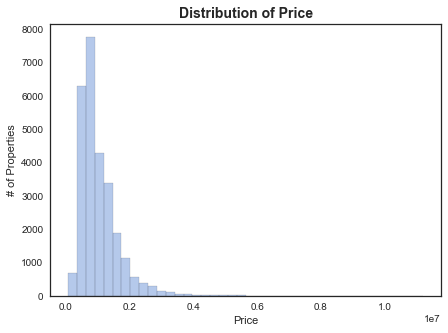

Price summary stats:

 count    2.724400e+04
mean     1.050210e+06
std      6.414923e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64


In [13]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=[7,5])
sns.distplot(df_small["Price"],kde=False, bins=40,hist_kws=dict(edgecolor="k"))
plt.title("Distribution of Price", fontweight="bold", fontsize=14)
plt.ylabel("# of Properties")
plt.show()

print("Price summary stats:\n\n",df_small.Price.describe())

The distribution of Price is non-normal and skewed right indicating that we will need to transform the variable before using linear models. The price ranges from $27,244-11,200,00. A log transformation will transform price into a normal distribution.

#### Examine each variable, explore the relationship to Price

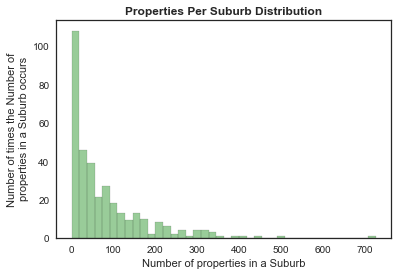

In [14]:
### Suburb ###
#print(df.Suburb.value_counts())
sns.distplot(df_small.Suburb.value_counts(),kde=False, color="green", bins=40,hist_kws=dict(edgecolor="k"))
plt.title("Properties Per Suburb Distribution", fontweight="bold")
plt.xlabel("Number of properties in a Suburb")
plt.ylabel("Number of times the Number of\n properties in a Suburb occurs")
plt.show()

The suburb names are clean: no need for modifications. 

From the graph we can determine that the number of observations per suburb ranges from 1 to approximately 700. With most of the suburbs containing less than 100 observations. 

9         1
16        1
12        2
10        5
8        14
7        20
6       137
1      1196
5      1209
4      5918
2      6785
3     11956
Name: Rooms, dtype: int64


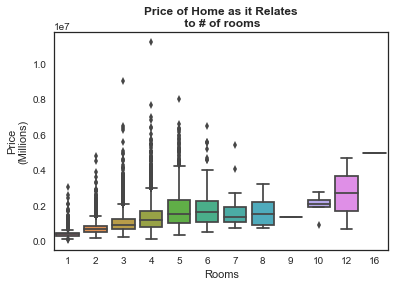

In [15]:
### Rooms ###
print(df_small.Rooms.value_counts().sort_values())
sns.boxplot(x=df["Rooms"], y=df["Price"])
plt.title("Price of Home as it Relates\n to # of rooms", fontweight="bold")
plt.ylabel("Price\n(Millions)")
plt.yscale("linear")
plt.show()

The majority of the observations have a room number within the 1-5 range. The mean price of the home almost scales linearly with number of rooms. However, there are alot of outliers in Rooms 1-5. The number of rooms provides valueable information about the price, but there are obviously other factors (location?) contributing to price.

h    18470
u     5908
t     2866
Name: Type, dtype: int64


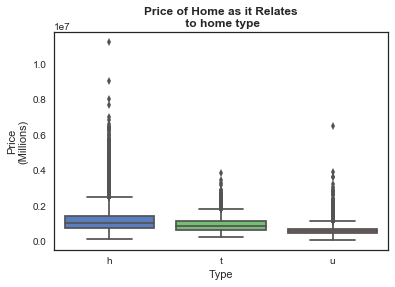

In [16]:
### Type ###
print(df.Type.value_counts())
sns.boxplot(x=df["Type"], y=df["Price"])
plt.title("Price of Home as it Relates\n to home type", fontweight="bold")
plt.ylabel("Price\n(Millions)")
plt.yscale("linear")
plt.show()

3 main types of home listed. House (h), unit/duplex (u), or townhouse (t). House makes up over 68% of the observations and looks to have the highest mean (slightly). Again, may be able to combine with other features.

S     17514
SP     3602
PI     3255
VB     2683
SA      190
Name: Method, dtype: int64


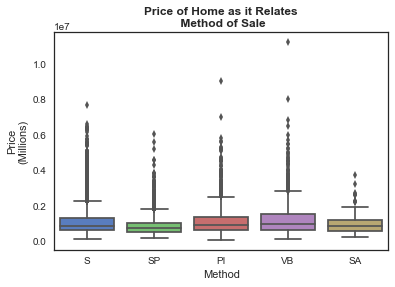

In [17]:
### Method ###
print(df.Method.value_counts())
sns.boxplot(x=df["Method"], y=df["Price"])
plt.title("Price of Home as it Relates\n Method of Sale", fontweight="bold")
plt.ylabel("Price\n(Millions)")
plt.yscale("linear")
plt.show()

This is not a noticeable difference for home price based on method of sale. Consider leaving this feature out or combining with another feature. 

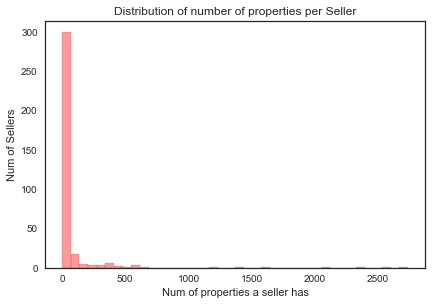

In [18]:
## SellerG ### 349 different unique sellers
#print(df.SellerG.value_counts())
plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
#plt.hist(df_small.SellerG.value_counts(),bins=20)
sns.distplot(df_small.SellerG.value_counts(),kde=False, color="red", bins=40,hist_kws=dict(edgecolor="k"))
plt.title("Distribution of number of properties per Seller")
plt.xlabel("Num of properties a seller has")
plt.ylabel("Num of Sellers")
plt.show()

There are 349 different sellers. Looks like the vast majority of sellers have a small amount of properties to sell. May be able to bin these.

#### Convert date into a form I can work with and explore relationship to price

In [19]:
### Date ### date property was sold
# need to convert Date into good format to plot against price. 
df_small[['Day','Month', 'Year']] = df_small['Date'].str.split('/',expand=True)

# drop old date variable and Day variable
df_small.drop(["Date","Day"], axis=1, inplace=True)

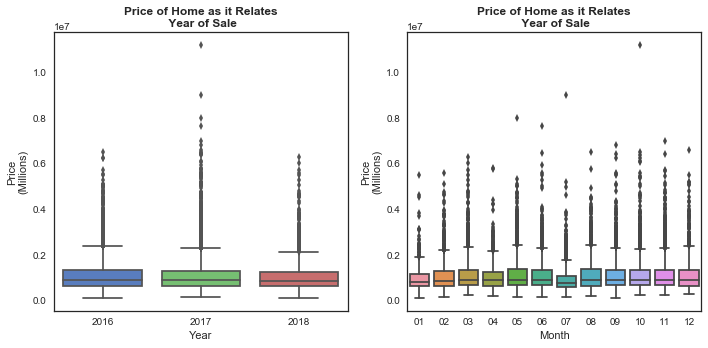

In [20]:
### Year and Month homes were sold ###
plt.figure(figsize=[10,5])

plt.subplot(121)
sns.boxplot(x=df_small["Year"], y=df_small["Price"])
plt.title("Price of Home as it Relates\n Year of Sale", fontweight="bold")
plt.ylabel("Price\n(Millions)")
plt.yscale("linear")

plt.subplot(122)
sns.boxplot(x=df_small["Month"], y=df_small["Price"])
plt.title("Price of Home as it Relates\n Year of Sale", fontweight="bold")
plt.ylabel("Price\n(Millions)")
plt.yscale("linear")
plt.tight_layout()
plt.show()

The Year sold and Month sold features look remarkbly similar. Not sure if this information alone helps us.

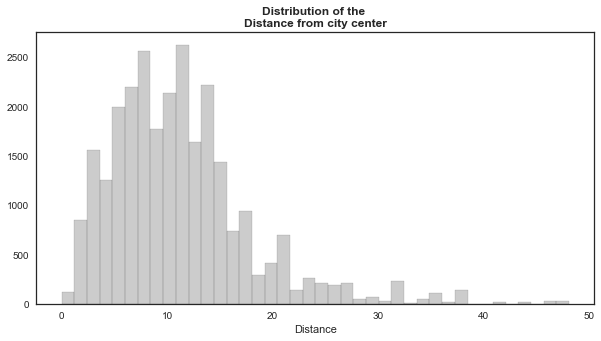

In [21]:
### Distance ###
plt.figure(figsize=[10,5])
sns.distplot(df_small["Distance"],kde=False, color="grey", bins=40,hist_kws=dict(edgecolor="k"))
plt.title("Distribution of the \nDistance from city center",fontweight="bold")
plt.xlabel("Distance")
plt.show()

Most properties are within 200km of city center. As the only remaining continuous variable I will need to log transform the variable to produce a normal distribution.

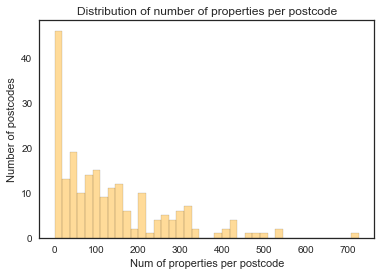

In [22]:
# ###Post code###
#determine if certain postcodes dominate the dataset.
sns.distplot(df_small.Postcode.value_counts(),kde=False, color="orange", bins=40,hist_kws=dict(edgecolor="k"))
plt.title("Distribution of number of properties per postcode")
plt.xlabel("Num of properties per postcode")
plt.ylabel("Number of postcodes")
plt.show()


There are no postcodes that contain a disproportional number of properties. Do not bin. 

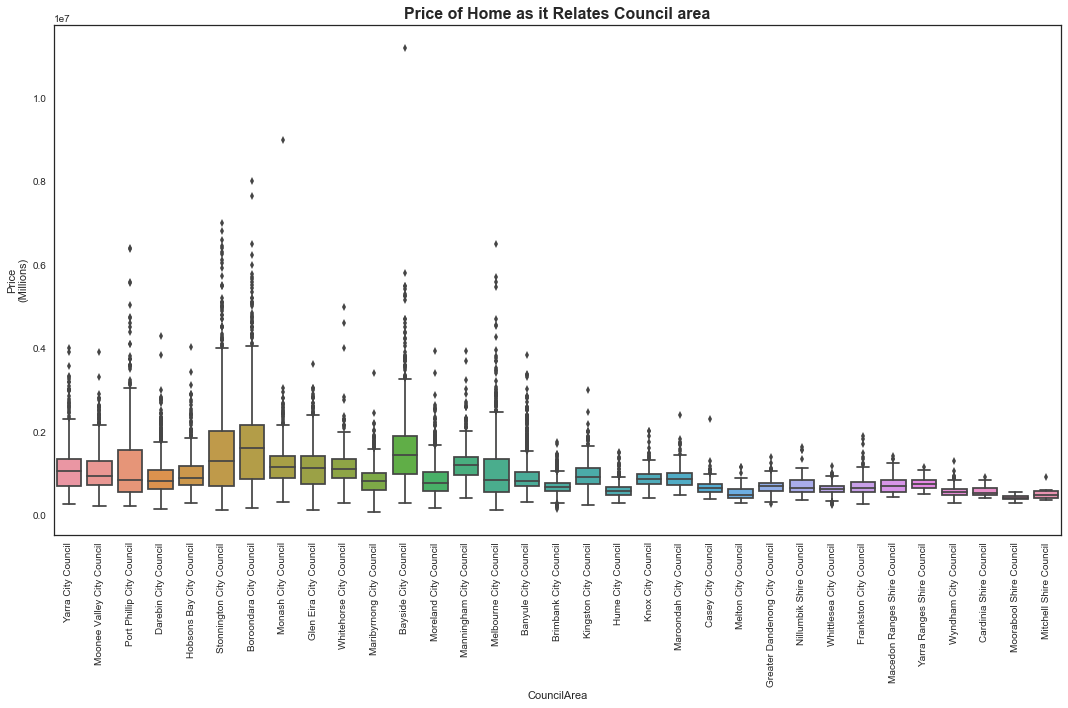

In [23]:
###CouncilArea###
#df_small.CouncilArea.value_counts()
plt.figure(figsize=[15,10])
ax =sns.boxplot(x=df_small["CouncilArea"], y=df_small["Price"])
plt.title("Price of Home as it Relates Council area", fontweight="bold", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel("Price\n(Millions)")
#plt.xlabel()
plt.yscale("linear")
plt.tight_layout()
plt.show()

There is a good amount of variability in many of these council areas. However there are still differences in the mean. This could be a useful feature.

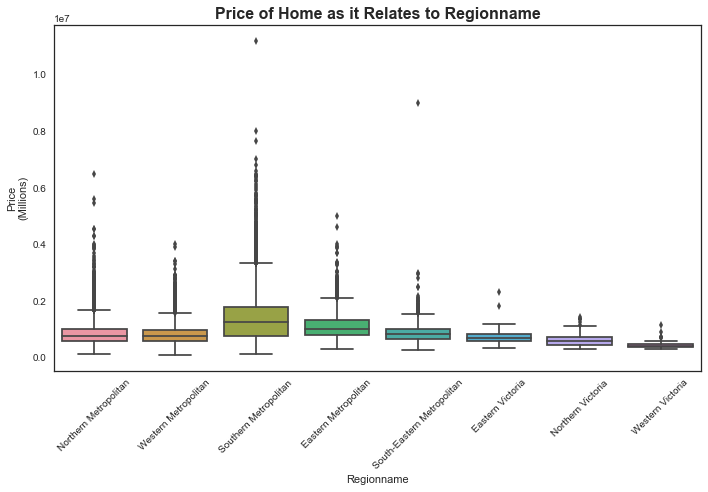

In [24]:
### Regionname ###
#boxplot
plt.figure(figsize=[10,7])
ax =sns.boxplot(x=df_small["Regionname"], y=df_small["Price"])
plt.title("Price of Home as it Relates to Regionname", fontweight="bold", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylabel("Price\n(Millions)")
#plt.xlabel()
plt.yscale("linear")
plt.tight_layout()
plt.show()

Again, alot of outliers in the Regionname feature. However, there looks to be like there are differences in the means for many of the regions.

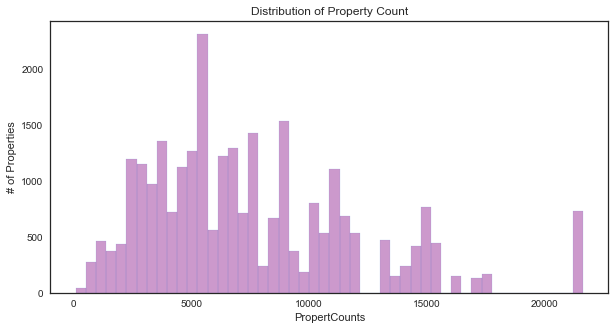

In [25]:
## Property count ###
plt.figure(figsize=[10,5])
#plt.hist(df_small["Propertycount"])
sns.distplot(df_small.Propertycount,kde=False, color="purple",hist_kws=dict(edgecolor="b"))
plt.title("Distribution of Property Count")
plt.ylabel("# of Properties")
plt.xlabel("PropertCounts")
plt.show()


Property counts distribution is quite non-normal. I am not sure if I want to use this variable. All it tells us is the number of properties that exist per suburb. Need to explore the relationship to price to see if it is useful.

#### Explore pairwise relationships of continuous variable to Price.

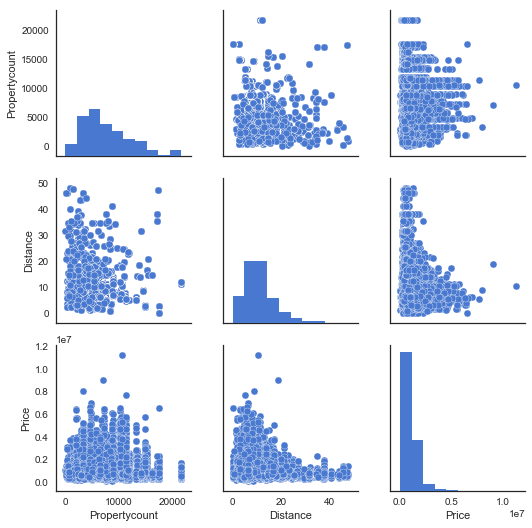

               Propertycount  Distance     Price
Propertycount       1.000000 -0.021705 -0.059017
Distance           -0.021705  1.000000 -0.211415
Price              -0.059017 -0.211415  1.000000


In [26]:
# continuoius variable df
continuous2_df = df_small[['Propertycount', 'Distance', 'Price']]

# pairwise analysis and R2 values
sns.pairplot(continuous2_df,kind='scatter')
plt.show()
print(continuous2_df.corr())

A small negative correlation between Price and distance from city center. No meaningful correlation between Price and Propertycount. Drop Propertycount from analysis. 

In [27]:
#drop property count
df_small.drop(["Propertycount"], inplace=True, axis=1)

#### We have the categorical variables suburb,  Postcode, CouncilArea, and Regionname and possible sellerG all related to location.  Look at interaction of categorical variables to see if some are redundant so we can drop some.

In [28]:
#drop postcode because it encodes similiar info to suburb
df_small.drop(["Postcode"], axis=1, inplace=True)

## Feature Engineering- First pass

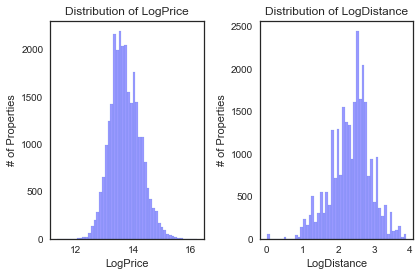

LogPrice Shapiro test for normality: (0.9929763078689575, 1.075845215144686e-33)
LogDistance Shapiro test for normality: (0.9870322942733765, 3.713440930460765e-43)

              LogDistance  LogPrice
LogDistance      1.00000  -0.16724
LogPrice        -0.16724   1.00000


In [71]:
#transform continuous variables Price and Distance using log transformation
df_small["LogPrice"] = np.log(df_small["Price"])
df_small["LogDistance"] = np.log(df_small["Distance"]+1)

#plot distribution of both
plt.subplot(121)
sns.distplot(df_small["LogPrice"],kde=False, color="blue",hist_kws=dict(edgecolor="b"))
plt.title("Distribution of LogPrice")
plt.ylabel("# of Properties")

plt.subplot(122)
sns.distplot(df_small["LogDistance"],kde=False, color="blue",hist_kws=dict(edgecolor="b"))
plt.title("Distribution of LogDistance")
plt.ylabel("# of Properties")
plt.tight_layout()
plt.show()


#check for normal distribution with shapiro test
print("LogPrice Shapiro test for normality:",stats.shapiro(df_small["LogPrice"]))
print("LogDistance Shapiro test for normality:",stats.shapiro(df_small["LogDistance"]))

continuous3_df = df_small[[ 'LogDistance', 'LogPrice']]
print('\n',continuous3_df.corr())

The log transformation is the only transformation that gets me close to a normal distribution. The shapiro test for normality has a P value well below 0.05 and therefore it is not normally distributed. My thinking is that the shapiro test may be sensitive to outliers. After log transformation Log distance and LogPrice have a small negative correlation (R2 = -0.17) 

In [30]:
#get dummies for categorical variables,
categories = ['Suburb', 'Type', 'Method','CouncilArea', 'Regionname', 'SellerG', 'Year'] 
df_with_dummies = pd.get_dummies(df_small, columns=categories)
df_with_dummies.shape

(27244, 751)

The featurespace is 748 columns wide now. Would like to reduce the feature space.

#### Use Random Forest for Model based feature selection

In [31]:
# split outcome variable from features
X = df_with_dummies.drop(["Price","LogPrice", 'Distance'], axis=1)
y = df_with_dummies.LogPrice

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#model based feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

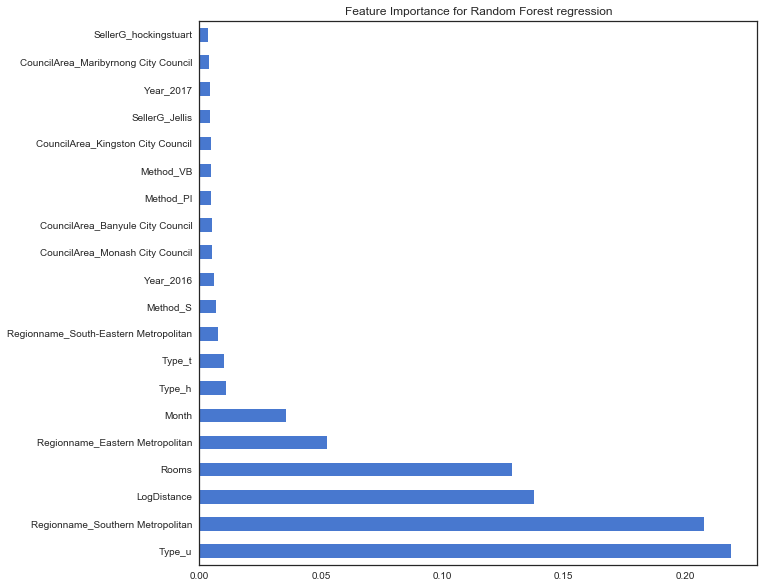

In [32]:
#bar plot of Feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)

plt.figure(figsize=[10,10])
feat_importances.plot(kind='barh')
plt.title("Feature Importance for Random Forest regression")
plt.show()

We can see from feature importances that type of home, region, rooms, Logdistance, month, year, method, and council are are all represented near the top. Use these features for a linear regression.

#### Run Linear Regression using selected features

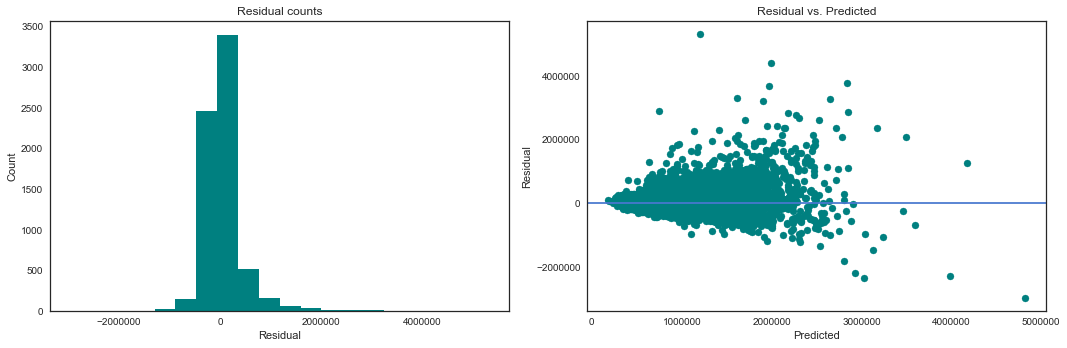


Intercept: 
 774441437673.8024

R-squared:
0.7388352668047743
                                        Coefficient
Year_2018                              1.518379e+12
Year_2017                              1.518379e+12
Year_2016                              1.518379e+12
Regionname_Eastern Metropolitan        6.235676e+11
Regionname_Southern Metropolitan       6.235676e+11
Regionname_Eastern Victoria            6.235676e+11
Regionname_South-Eastern Metropolitan  6.235676e+11
Regionname_Western Metropolitan        6.235676e+11
Regionname_Northern Metropolitan       6.235676e+11
Regionname_Northern Victoria           6.235676e+11


In [83]:
# new df with important features
df_imp_features = df_small[["LogPrice", "Price", "LogDistance","Rooms", "Type", "Method",
                            "CouncilArea", "Regionname", "Month", "Year"]]

#new dummies for features
new_categories = ['Type',  'Method','CouncilArea', 'Regionname', 'Year', 'Month'] 
df_imp_feature_dummy = pd.get_dummies(df_imp_features, columns=new_categories)


# split outcome variable from features
X1 = df_imp_feature_dummy.drop(["Price","LogPrice"], axis=1)
y1 = df_imp_feature_dummy.LogPrice

#split into training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

#instantiate linreg
linregr=linear_model.LinearRegression()
linregr.fit(X1_train,y1_train)

#make predictions on test data and convert back to orginal scale
predicted = np.exp(linregr.predict(X1_test).ravel())
actual = np.exp(y1_test)

# Calculate the error, also called the residual.
residual = actual - predicted

# plot histogram to check for multivariate normality.
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(residual, color='teal', bins=20)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')

# check for homoscedasticity
plt.subplot(122)
plt.scatter(predicted, residual, color='teal')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.tight_layout()
plt.show()

# Inspect the results.
print('\nIntercept: \n', linregr.intercept_)
print('\nR-squared:')
print(linregr.score(X1_test, y1_test))

# #coefficients
coeff_df = pd.DataFrame(linregr.coef_,X1.columns,columns=['Coefficient'])
ranked_linreg_coeff = coeff_df.sort_values("Coefficient", ascending = False)
print(ranked_linreg_coeff.head(10))


The residuals look to be distributed fairly normally, but are heteroscedastic. As the price of the homes increaser the residuals do as well. Need to target this area. Well, the R2 is not bad. However, the intercept and coefficients are nonsensical. Not sure what is causing this. 

In [34]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(actual, predicted))
print('MSE:', metrics.mean_squared_error(actual, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, predicted)))

MAE: 223928.51639064634
MSE: 143921410729.64008
RMSE: 379369.7546321268


These errors are not to bas compared to some of the other Kaggle competitors, but my mean absolute error is still roughly 224,00 per observation.

#### Try Gradient boosted Regressor

In [54]:
# new df with important features, not using log transformed values
df_imp_features_GBR = df_small[[ "Price", "Distance","Rooms", "Type", "Method",
                            "CouncilArea", "Regionname", "Month", "Year"]]

#new dummies for features
new_categories = ['Type',  'Method','CouncilArea', 'Regionname', 'Year', 'Month'] 
df_imp_feature_dummy_GBR = pd.get_dummies(df_imp_features_GBR, columns=new_categories)


# split outcome variable from features
X2 = df_imp_feature_dummy_GBR.drop(["Price"], axis=1)
y2 = df_imp_feature_dummy_GBR.Price

#split into training and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

#initiate gradient boosters--------->>>
GBR = GradientBoostingRegressor(n_estimators=400, max_depth=10,learning_rate=0.01, loss='huber',random_state=1)

#fit
GBR.fit(X2_train, y2_train)

#Check accuracy of prediction
GBR.predict(X2_test)
GBR.score(X2_test, y1_test)

#cross validation  
score = cross_val_score(GBR, X2_test, y2_test, cv=5)

print('Cross Val scores: ',score,'\n')
print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Cross Val scores:  [0.66760243 0.65602152 0.62962401 0.69340029 0.68149447] 

Cross validation Accuracy: 0.67 (+/- 0.04)


Slightly lower R2 values than the linear regression.  

#### Look at GBR feature importances

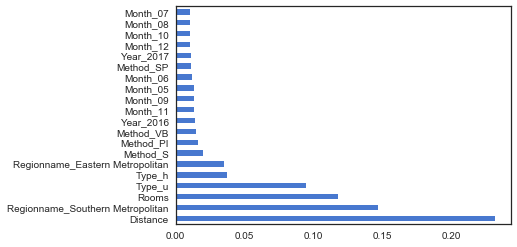

In [55]:
feat_importances = pd.Series(GBR.feature_importances_, index=X2.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.show()

Hard to compare these to the Linear regression since these don't give us direction of relationship with price.

#### Use partial dependence plot

<Figure size 720x720 with 0 Axes>

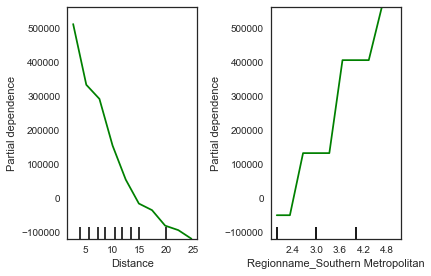

In [57]:
#pick top ten features to plot
cols_to_use = ['Distance', 'Regionname_Southern Metropolitan','Rooms','Type_u','Type_h',
               'Regionname_Eastern Metropolitan','Method_S','Method_PI','Method_VB',
               'Year_2016']

plt.figure(figsize=[10,10])
plot_partial_dependence(GBR, features=[0,1], X=X2, feature_names=cols_to_use,  grid_resolution=10)
plt.tight_layout()
plt.show()

For every 5km outside of the city center there is a decrease of approximately $200,000. Not sure how to interpret the Regionname plot.

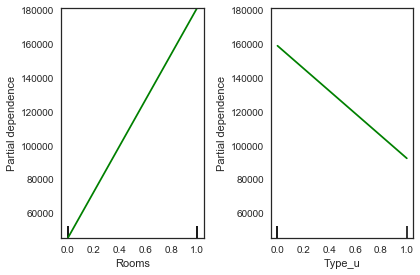

In [58]:
plot_partial_dependence(GBR, features=[2,3], X=X2, feature_names=cols_to_use,  grid_resolution=10)
plt.tight_layout()
plt.show()

Looks like for every additional room the price goes up 3 fold.

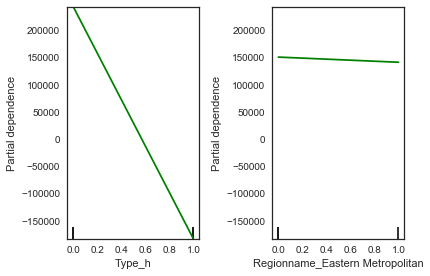

In [59]:
plot_partial_dependence(GBR, features=[4,5], X=X2, feature_names=cols_to_use,  grid_resolution=10)
plt.tight_layout()
plt.show()

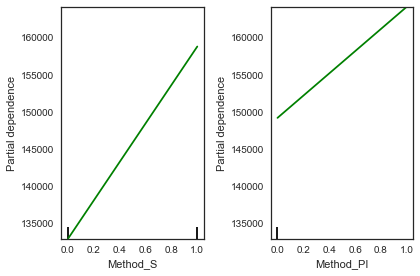

In [60]:
plot_partial_dependence(GBR, features=[6,7], X=X2, feature_names=cols_to_use,  grid_resolution=10)
plt.tight_layout()
plt.show()

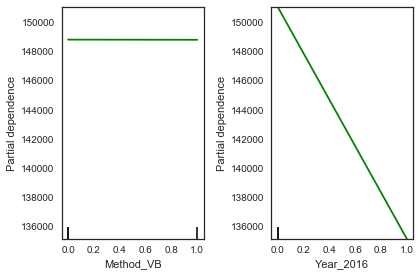

In [61]:
plot_partial_dependence(GBR, features=[8,9], X=X2, feature_names=cols_to_use,  grid_resolution=10)
plt.tight_layout()
plt.show()

#### Feature Engineering- 2nd Pass